# Filter the data

In [1]:
import pywt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
# Load the data

data = pd.read_csv('stocks_data.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03 00:00:00-05:00,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
1,2000-01-04 00:00:00-05:00,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2,2000-01-05 00:00:00-05:00,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
3,2000-01-06 00:00:00-05:00,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
4,2000-01-07 00:00:00-05:00,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
...,...,...,...,...,...,...,...
4899,2019-06-25 00:00:00-04:00,2945.780029,2946.520020,2916.010010,2917.379883,2917.379883,3578050000
4900,2019-06-26 00:00:00-04:00,2926.070068,2932.590088,2912.989990,2913.780029,2913.780029,3478130000
4901,2019-06-27 00:00:00-04:00,2919.659912,2929.300049,2918.570068,2924.919922,2924.919922,3122920000
4902,2019-06-28 00:00:00-04:00,2932.939941,2943.979980,2929.050049,2941.760010,2941.760010,5420700000


In [3]:
# Parse the dates

data['Date'] = data['Date'].apply(lambda x: x[:11])
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
...,...,...,...,...,...,...
2019-06-25,2945.780029,2946.520020,2916.010010,2917.379883,2917.379883,3578050000
2019-06-26,2926.070068,2932.590088,2912.989990,2913.780029,2913.780029,3478130000
2019-06-27,2919.659912,2929.300049,2918.570068,2924.919922,2924.919922,3122920000


In [5]:
# Create a filter for the data

def low_pass_filter(signal, thresh=0.63, wavelet='db4'):
    thresh = thresh * np.nanmax(signal)
    coeff = pywt.wavedec(signal, wavelet, mode='per')
    coeff[3:] = (pywt.threshold(i, value=thresh, mode='soft') for i in coeff[3:])
    reconstructed_signal = pywt.waverec(coeff, wavelet, mode='per')
    return reconstructed_signal

In [6]:
data['FilteredOpen'] = low_pass_filter(data['Open'], thresh=0.01, wavelet='coif3')
data

,Open,High,Low,Close,Adj Close,Volume,FilteredOpen
Date,,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000,1509.891113
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,1460.423078
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000,1438.658516
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000,1386.279016
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,1399.262688
...,...,...,...,...,...,...,...
2019-06-25,2945.780029,2946.520020,2916.010010,2917.379883,2917.379883,3578050000,2911.075968
2019-06-26,2926.070068,2932.590088,2912.989990,2913.780029,2913.780029,3478130000,2913.774021
2019-06-27,2919.659912,2929.300049,2918.570068,2924.919922,2924.919922,3122920000,2913.647693


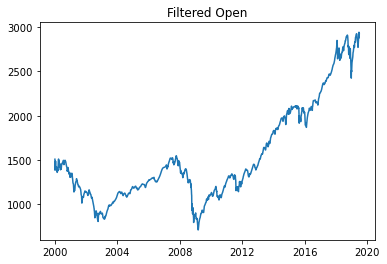

In [9]:
plt.plot(data['FilteredOpen'])
plt.title('Filtered Open')
plt.show()

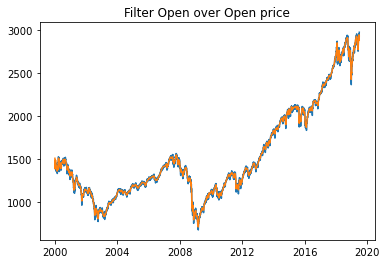

In [11]:
plt.plot(data['Open'])
plt.plot(data['FilteredOpen'])
plt.title('Filter Open over Open price')
plt.show()

In [13]:
mean_squared_error(data['Open'], data['FilteredOpen']) ** 0.5

13.978930906982004

In [14]:
data.to_csv('stock_data_filtered.csv')